# Übung 1

Installiere Pakete zur Darstellung und aktiviere Jupyter Notebook Erweiterung

In [9]:
!jupyter nbextension enable --py widgetsnbextension
# Danach Jupyter Notebook neu starten!

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Importiere alles nötige

In [1]:
import ipywidgets as widgets
from scipy import stats
from ipywidgets import interact, interact_manual
from Uebung1_BerryEssen import empirical_dist_zn, plot_zn_g, plot_diff_zn_g
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget



## Aufgabe Berry-Essen

Der Zentrale Grenzwertsatz nach Berry und Essen stellt einen allgemeinen Zusammenhang
zwischen der Verteilung einer standardisierten Summe von Zufallsvariablen und einer standardnormalverteilten
Zuvallsvariable auf. Untersuchen Sie, ob die Abschaetzung fuer verschiedene
Verteilungen der Summanden unterschiedlich scharf ist.

Lege nötige Felder an

In [2]:
rv_dict = {
    'N(0,1)': stats.norm,
    'Exp(1)': stats.expon,
    't, df=2.1': stats.t(2.1),
    't, df=3.1': stats.t(3.1),
    't, df=4.1': stats.t(4.1)
}
#print(list(rv_dict.keys()))
#print(rv_dict[list(rv_dict.keys())[0]])

Visualisierung

interactive(children=(IntSlider(value=5000, description='n_per_sample', max=10000, min=10, step=10), IntSlider…

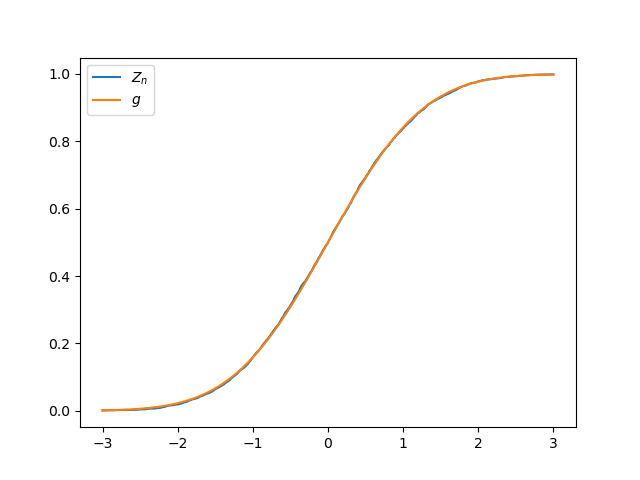

In [3]:

fig, ax = plt.subplots()

@interact
def show_zn_g_deviations(n_per_sample=(10, 10000, 10), n_samples=(10, 10000, 10), 
                         distribution=list(rv_dict.keys()),#
                        plot=['F(Zn) und F(g)', 'Difference']):
    ax.clear()
    ecdf, rho = empirical_dist_zn(n_samples, n_per_sample, rv_dict[distribution])
    if plot=='F(Zn) und F(g)':
        plot_zn_g(ecdf, rho, n_per_sample, ax=ax)
    elif plot=='Difference':
        plot_diff_zn_g(ecdf, rho, n_per_sample, ax=ax)

